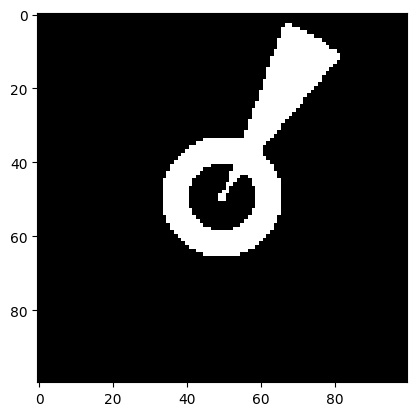

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
dm_path = '/Users/marcusdaghlian/CVL Dropbox/Marcus  Daghlian/240522NG/hypot/code/aps_pRF.mat'
dm_data = sio.loadmat(dm_path)
dm = dm_data['ApFrm']
plt.imshow(dm[:,:,50], cmap='gray')
# np.save('dm.npy', dm)

# make model

In [9]:
from braincoder.models import GaussianPRF2DWithHRF, ContrastSensitivityWithHRF, DifferenceOfGaussiansPRF2DWithHRF, DivisiveNormalizationGaussianPRF2DWithHRF, CompressiveSpatialGaussiansPRF2DWithHRF
from braincoder.hrf import SPMHRFModel, CustomHRFModel, HRFModel
dm = np.load('dm.npy')
paradigm = np.rollaxis(dm, 2, 0) # time; x ; y
radius_vert = 10
radius_horiz = 10
tr = 1.0
x_grid, y_grid = np.meshgrid(
    np.linspace(-radius_horiz, radius_horiz, dm.shape[1]),
    np.linspace(-radius_vert, radius_vert, dm.shape[0])
    )

grid_coordinates = np.stack((x_grid.ravel().astype(np.float32), y_grid.ravel().astype(np.float32)), 1)

# Create the model using the loaded HRF parameter from the YAML config
model = GaussianPRF2DWithHRF(
    grid_coordinates, 
    paradigm=paradigm,
    hrf_model=SPMHRFModel(tr=tr), 
    # flexible_hrf_parameters=True,
    )        

#     model = DivisiveNormalizationGaussianPRF2DWithHRF(
#         grid_coordinates, 
#         paradigm=paradigm,
#         hrf_model=SPMHRFModel(tr=dm.TR), 
#         flexible_hrf_parameters=flexible_hrf_parameters,
#         )                    

#     model = DifferenceOfGaussiansPRF2DWithHRF(
#         grid_coordinates, 
#         paradigm=paradigm,
#         hrf_model=SPMHRFModel(tr=dm.TR), 
#         flexible_hrf_parameters=flexible_hrf_parameters,
#         )     

#     model = CompressiveSpatialGaussiansPRF2DWithHRF(
#         grid_coordinates, 
#         paradigm=paradigm,
#         hrf_model=SPMHRFModel(tr=dm.TR), 
#         flexible_hrf_parameters=flexible_hrf_parameters,
#         )                                            



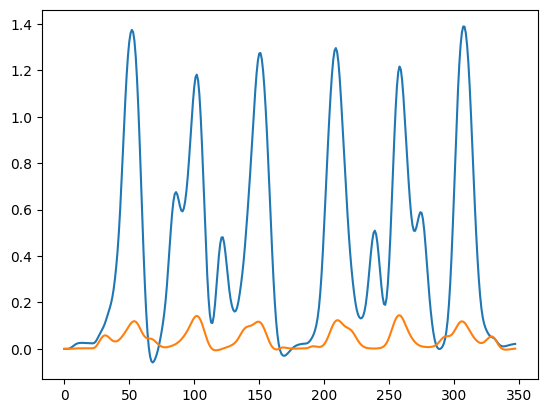

In [ ]:
pars = {
    'x' : np.array([-1,1,3]),
    'y' : np.array([-1,1,3]), 
    'sd' : np.array([1,1,2]),
    'baseline' : np.array([0.0, 0.0, 0.0, ]), 
    'amplitude' : np.array([10, 10, 10, ]),
}
import pandas as pd 
pars = pd.DataFrame(pars)
pars
a = model.predict(parameters=pars)
plt.plot(a.iloc[:,0])
plt.plot(a.iloc[:,1])

  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
Using cached patsy-1.0.2-py2.py3-none-any.whl (233 kB)
